In [1]:
from  warnings import filterwarnings
filterwarnings("ignore")

In [12]:
import pandas as pd
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# cat and con Selection
cat=list(df.columns[df.dtypes=="object"])
con=list(df.columns[df.dtypes!="object"])
cat

['species']

In [15]:
# X and Y Sepration
X=df.drop(labels=["species"],axis=1)
Y=df[["species"]]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [17]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['species']=le.fit_transform(Y['species'])
Y['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [19]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                         ('scalar',StandardScaler())])

In [22]:
x_pre=num_pipe.fit_transform(X)
x_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
cols=num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [24]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,Y,test_size=0.3,random_state=21)
xtrain.shape,xtest.shape

((105, 4), (45, 4))

### Knn classifier model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [27]:
model.score(xtrain,ytrain)

0.9714285714285714

In [28]:
model.score(xtest,ytest)

0.9111111111111111

In [29]:
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)

In [30]:
ypred_tr[0:5]

array([0, 0, 0, 1, 0])

In [32]:
ytrain.head()

,species
36,0
37,0
13,0
68,1
11,0


### View confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(ytest,ypred_ts)
cf


array([[13,  1,  0],
       [ 0, 15,  1],
       [ 0,  2, 13]], dtype=int64)

<Axes: >

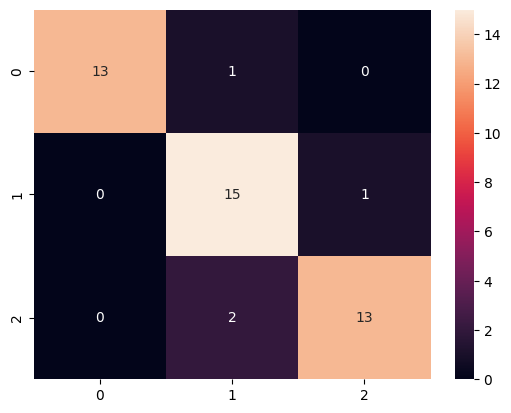

In [37]:
import seaborn as sns
sns.heatmap(cf,annot=True)

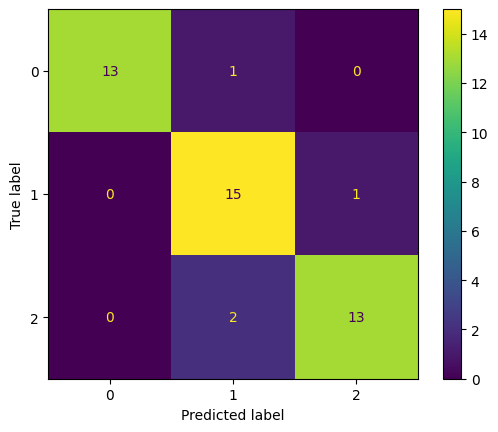

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cfd=ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      0.94      0.88        16
           2       0.93      0.87      0.90        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



### Hyperparameter tuning with Randomized Search CV

In [41]:
params={'n_neighbors':[2,3,4,5,6,7]}
params

{'n_neighbors': [2, 3, 4, 5, 6, 7]}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier()
rscv=RandomizedSearchCV(knn,param_distributions=params,cv=5,scoring="f1_macro")
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7]},
                   scoring='f1_macro')

In [43]:
rscv.best_params_

{'n_neighbors': 5}

In [44]:
rscv.best_estimator_

KNeighborsClassifier()

In [45]:
best_knn=rscv.best_estimator_
best_knn

KNeighborsClassifier()

In [46]:
# Predict the value
ypred_tr1=best_knn.predict(xtrain)
ypred_ts1=best_knn.predict(xtest)

In [47]:
ypred_ts1[0:5]

array([1, 0, 0, 0, 1])

In [48]:
ytest.head()

,species
92,1
44,0
7,0
21,0
95,1


In [50]:
ypred_tr_it=le.inverse_transform(ypred_tr1)
ypred_tr_rt

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setos

In [51]:
ypred_ts_it=le.inverse_transform(ypred_ts1)
ypred_ts_it

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

## Predicting for new column


In [55]:
def predict_data(model, num_pipe, le):
    sep_len = float(input('Please Enter Sepal Length : '))
    sep_wid = float(input('Please Enter Sepal Width : '))
    pet_len = float(input('Please Enter Petal Length : '))
    pet_width = float(input('Please Enter Petal Widht : '))
    xnew = pd.DataFrame([sep_len,sep_wid,pet_len,pet_width]).T
    xnew.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    xnew_pre = num_pipe.transform(xnew)
    xnew_pre = pd.DataFrame(xnew_pre,columns=num_pipe.get_feature_names_out())
    pred = model.predict(xnew_pre)
    pred_lb = le.inverse_transform(pred)
    prob = model.predict_proba(xnew_pre).max()
    print(f'Predicted Species : {pred_lb} with Probavbility : {prob:.4f}')
    return pred_lb, prob

In [56]:
predict_data(best_knn,num_pipe,le)

Predicted Species : ['virginica'] with Probavbility : 0.8000


(array(['virginica'], dtype=object), 0.8)